## Q3:

Do peak (rush-hour) riders experience longer travel times than non-peak riders? 



In [46]:
import pandas as pd 

metrics_df = pd.read_csv("../raw_data/metrics.csv")

metrics_df = metrics_df.dropna()

metrics_df['month'] = pd.to_datetime(metrics_df['month']).dt.normalize()
metrics_df['division'] = metrics_df['division'].astype(str)
metrics_df['line'] = metrics_df['line'].astype(str)
metrics_df['period'] = metrics_df['period'].astype(str)
metrics_df['num_passenger'] = metrics_df['num_passengers'].astype(float)
metrics_df['additional_platform_time'] = metrics_df['additional_platform_time'].astype(float)
metrics_df['additional_train_time'] = metrics_df['additional_train_time'].astype(float)
metrics_df['total_apt'] = metrics_df['total_apt'].astype(float)
metrics_df['total_att'] = metrics_df['total_att'].astype(float)
metrics_df['over_five_mins'] = metrics_df['over_five_mins'].astype(float)
metrics_df['over_five_mins_perc'] = metrics_df['over_five_mins_perc'].astype(float)
metrics_df['customer_journey_time'] = metrics_df['customer_journey_time'].astype(float)

metrics_df['line'] = metrics_df['line'].str.strip().str.upper()
metrics_df['division'] = metrics_df['division'].str.strip().str.upper()
metrics_df['period'] = metrics_df['period'].str.strip().str.upper()

metrics_df

,month,division,line,period,num_passengers,additional_platform_time,additional_train_time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer_journey_time,num_passenger
0,2024-01-01,A DIVISION,1,OFFPEAK,4873143.500,1.656052,0.796657,8.070179e+06,3882225.200,763100.9000,0.156593,0.843407,4873143.500
1,2024-01-01,A DIVISION,1,PEAK,4765373.000,2.115036,0.873300,1.007894e+07,4161600.200,743524.6000,0.156027,0.843973,4765373.000
2,2024-01-01,A DIVISION,2,OFFPEAK,2878163.800,1.606833,0.501318,4.624728e+06,1442874.900,487204.1000,0.169276,0.830724,2878163.800
3,2024-01-01,A DIVISION,2,PEAK,3092725.500,2.073322,0.561746,6.412216e+06,1737327.100,460791.2000,0.148992,0.851008,3092725.500
4,2024-01-01,A DIVISION,3,OFFPEAK,2125353.800,1.249190,0.328101,2.654971e+06,697329.800,265963.7000,0.125139,0.874861,2125353.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2024-12-01,B DIVISION,S FKLN,PEAK,194189.340,0.570730,0.057167,1.108297e+05,11101.285,9461.5890,0.048724,0.951276,194189.340
572,2024-12-01,B DIVISION,S ROCK,OFFPEAK,26513.352,1.262324,-0.908065,3.346844e+04,-24075.834,3445.4740,0.129952,0.870048,26513.352
573,2024-12-01,B DIVISION,S ROCK,PEAK,19257.482,0.878703,-1.183044,1.692160e+04,-22782.447,1812.6135,0.094125,0.905875,19257.482
574,2024-12-01,B DIVISION,W,OFFPEAK,1265461.600,0.938558,0.257632,1.187710e+06,326022.940,142330.0200,0.112473,0.887527,1265461.600


In [47]:
journey_summary = metrics_df[['line', 'month', 'period', 'customer_journey_time']]
journey_summary['~customer_journey_time'] = 1 - metrics_df['customer_journey_time']
journey_summary

C:\Users\victo\AppData\Local\Temp\ipykernel_29672\4111445325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  journey_summary['~customer_journey_time'] = 1 - metrics_df['customer_journey_time']


,line,month,period,customer_journey_time,~customer_journey_time
0,1,2024-01-01,OFFPEAK,0.843407,0.156593
1,1,2024-01-01,PEAK,0.843973,0.156027
2,2,2024-01-01,OFFPEAK,0.830724,0.169276
3,2,2024-01-01,PEAK,0.851008,0.148992
4,3,2024-01-01,OFFPEAK,0.874861,0.125139
...,...,...,...,...,...
571,S FKLN,2024-12-01,PEAK,0.951276,0.048724
572,S ROCK,2024-12-01,OFFPEAK,0.870048,0.129952
573,S ROCK,2024-12-01,PEAK,0.905875,0.094125
574,W,2024-12-01,OFFPEAK,0.887527,0.112473


In [66]:
#avg customer journey time % --> average % of how many people complete their trip within 5 minutes of the scheduled time.

journey_summary["customer_journey_time"].mean()

0.8522924837673611

In [48]:
# Split into PEAK and OFFPEAK
peak = metrics_df[metrics_df['period'] == 'PEAK'][['line', 'month', 'customer_journey_time']]
offpeak = metrics_df[metrics_df['period'] == 'OFFPEAK'][['line', 'month', 'customer_journey_time']]

# Rename columns so they're clear after merge
peak = peak.rename(columns={'customer_journey_time': 'cj_peak'})
offpeak = offpeak.rename(columns={'customer_journey_time': 'cj_offpeak'})

# Merge PEAK and OFFPEAK on line + month
merged = peak.merge(offpeak, on=['line', 'month'])

# New dataframe with the difference (PEAK - OFFPEAK)
peak_diff_df = merged[['line', 'month']].copy()
peak_diff_df['peak_nonpeak_diff %'] = (merged['cj_peak'] - merged['cj_offpeak']) *100

peak_diff_df

,line,month,peak_nonpeak_diff %
0,1,2024-01-01,0.056660
1,2,2024-01-01,2.028406
2,3,2024-01-01,-1.514810
3,4,2024-01-01,0.800590
4,5,2024-01-01,1.589853
...,...,...,...
283,Q,2024-12-01,-1.290820
284,R,2024-12-01,0.271796
285,S FKLN,2024-12-01,-1.608470
286,S ROCK,2024-12-01,3.582728


In [49]:
# only seeing the lines and months that have negative peak_nonpeak_diff 
neg_peaks = peak_diff_df[peak_diff_df["peak_nonpeak_diff %"] < 0]
neg_peaks

,line,month,peak_nonpeak_diff %
2,3,2024-01-01,-1.514810
5,6,2024-01-01,-0.872706
9,B,2024-01-01,-0.457856
14,G,2024-01-01,-0.662195
17,M,2024-01-01,-0.278139
...,...,...,...
273,B,2024-12-01,-0.163110
279,JZ,2024-12-01,-1.415226
280,L,2024-12-01,-0.234479
283,Q,2024-12-01,-1.290820


In [50]:
neg_peaks["line"].value_counts()


line
6         12
G          7
Q          6
S FKLN     6
B          5
3          3
M          3
S ROCK     3
C          2
L          2
JZ         2
4          1
D          1
Name: count, dtype: int64

In [61]:
max_diff = neg_peaks["peak_nonpeak_diff %"].max()
min_diff = neg_peaks["peak_nonpeak_diff %"].min()

print('min diff %:', min_diff)
print('max diff %:', max_diff)

#in this case, the min value is actually the max (because the more negative value is the bigger the difference
#between peak and non-peak differences). 

min diff %: -2.295917000000003
max diff %: -0.013898999999994999


In [63]:
#counting how many negative peak vs non-peak differences per month (instead of per line)
month_counts = neg_peaks.groupby("month")["line"].count()
month_counts

month
2024-01-01    7
2024-02-01    6
2024-03-01    2
2024-04-01    3
2024-05-01    4
2024-06-01    4
2024-07-01    6
2024-08-01    3
2024-09-01    3
2024-10-01    2
2024-11-01    7
2024-12-01    6
Name: line, dtype: int64

## Data Visualization

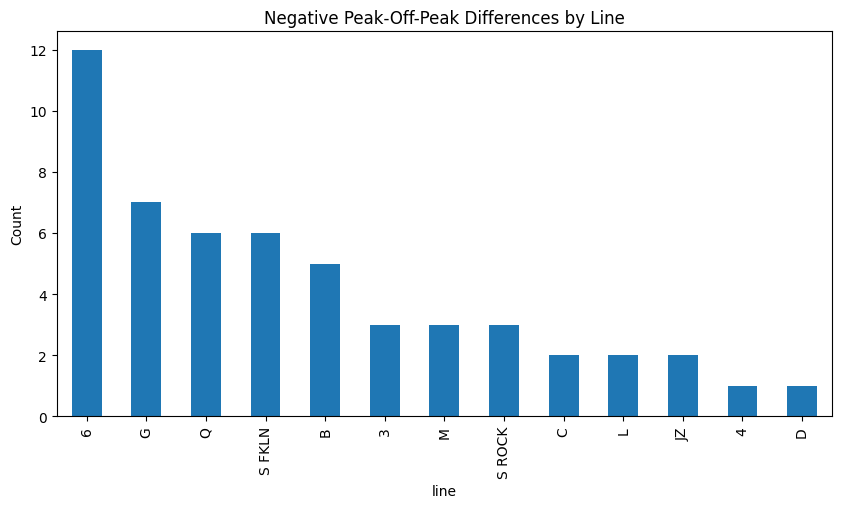

In [68]:
neg_counts = neg_peaks["line"].value_counts()

neg_counts.plot(kind="bar", figsize=(10,5), title="Negative Peak-Off-Peak Differences by Line")
plt.ylabel("Count")
plt.show()

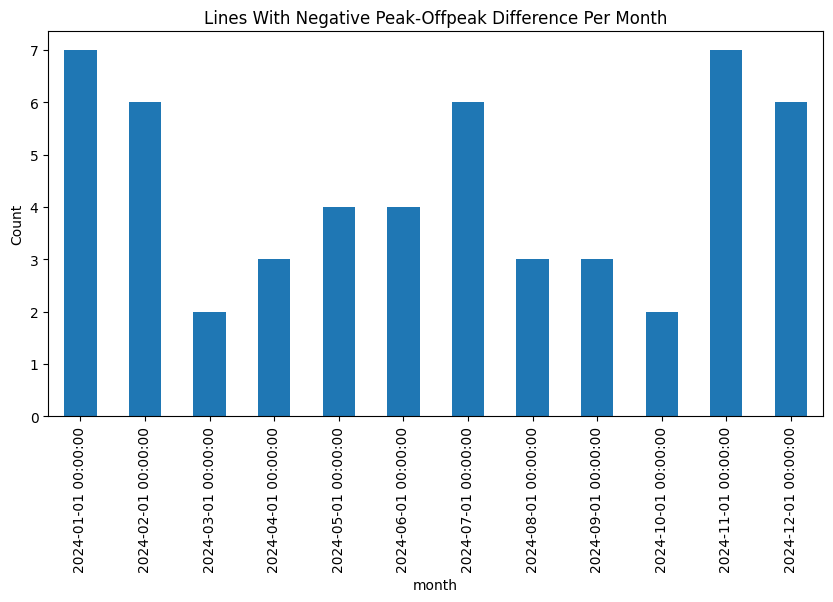

In [69]:
month_counts = neg_peaks.groupby("month")["line"].count()
month_counts.plot(kind="bar", figsize=(10,5), title="Lines With Negative Peak-Offpeak Difference Per Month")
plt.ylabel("Count")
plt.show()


## Data Analysis

Instead of using the additional_platform_time column—since our Q2 analysis showed it wasn’t very reliable— we chose to use the customer_journey_time column from metrics_df (Dataset 2) to determine is peak rush-hour riders experience longer travel times than non-peak riders. This customer_journey_time column reports the estimated percentage of customers whose journeys are completed within 5 minutes of the scheduled time. While it doesn’t provide exact travel times, these percentages offer a clearer and more meaningful indicator of overall service performance, making it more useful for analysis.

On avergage, 85% of customers complete their (journey via subways) within 5 minutes of scheduled time. 

We also calculated the % difference of customers completing their (journey via subways) within 5 minutes of scheduled time for peak and non-peak travelers for each month and line. These differences can be seen under the columns peak_nonpeak_diff %. For context, we converted peak_nonpeark_diff into percent form by multiplying by a 100 to make it easier to read. Originally the MTA dataset "MTA Subway Customer Journey-Focused Metrics: 2020-2024" is in percent form on the website, but when pulling it into VSC, it put it in decimal form. We interpretted the results under the peak_nonpeak_diff % columns as: 
positive numbers under the peak_nonpeak_diff column indicate peak riders have better performance (aka wait less than 5 minutes for train) and negative numbers indicate the opposite. We decided to further look into the negative numbers, since that might give us more incite as to why those peak travels may experience longer travel times. 

In the first visualization, we counted the Negative Peak-Off-Peak Differences by Line; in the bar graph, it seems like Peak rush hour subway customers experienced longer travel times for line 6 (having the most Negative Peak-Off-Peak Differences (12)), while lines 4 and D experinced the least (1) in 2024. All subway lines except the G, S (FKLN), and S (ROCK) run through Manhattan, so Line 6 may have more riders simply because it serves a busier, high-traffic area. In the second visualizations, we counted the Negative Peak-Off-Peak Differences by Month; January and November seem to have the worst months for peak rush hour travelers. 
 
We also calculated the largest and smallest peak vs. non-peak differences. The largest difference was –2.3%, meaning 2.3% fewer peak riders completed their trips within 5 minutes of the scheduled time compared to non-peak riders. While this may seem small, it becomes significant when considering the massive number of riders who use the NYC subway system every day. 